We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Preprocessing
The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
#The following scipt perfoms the feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
y_pred

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 13  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Comparing Error Rate with the K Value

In [13]:
error = []
#calculating error for k values between 1 and 40.
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

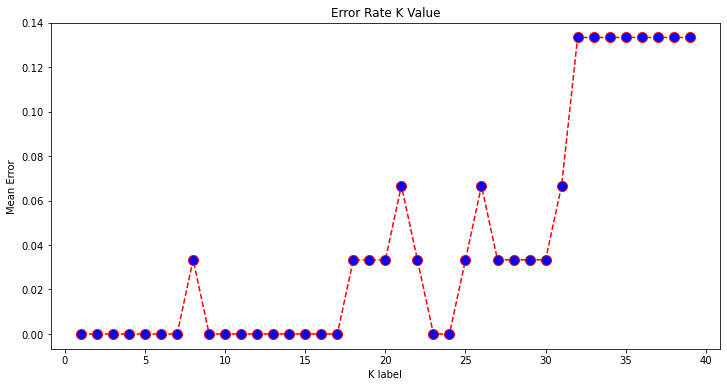

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = '--', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K label')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the value of the K is between 5 and 18. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.